In [1]:
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns
import numpy as np
import math

In [4]:
m = SocialDB(100)

In [5]:
m.df

,class
id,
548792,proukr
798009,proukr
564982,nocare
505389,nocare
754102,nocare
...,...
872275,proukr
994911,prorus
625920,nocare


In [6]:
m.edges

[{'id': 429804, 'from': 946904, 'to': 641057},
 {'id': 977542, 'from': 946904, 'to': 111305},
 {'id': 115251, 'from': 338764, 'to': 735057},
 {'id': 234887, 'from': 717290, 'to': 111305},
 {'id': 313007, 'from': 420433, 'to': 399850},
 {'id': 997263, 'from': 420433, 'to': 391638},
 {'id': 309016, 'from': 548447, 'to': 571880},
 {'id': 999688, 'from': 434190, 'to': 641057},
 {'id': 198614, 'from': 375579, 'to': 548447},
 {'id': 945141, 'from': 533495, 'to': 556539},
 {'id': 423088, 'from': 731198, 'to': 789908},
 {'id': 952905, 'from': 391638, 'to': 872275},
 {'id': 439590, 'from': 434190, 'to': 420433},
 {'id': 270106, 'from': 391638, 'to': 364123},
 {'id': 222821, 'from': 599410, 'to': 269518},
 {'id': 590211, 'from': 564982, 'to': 351243},
 {'id': 270320, 'from': 197311, 'to': 505389},
 {'id': 192317, 'from': 634845, 'to': 693952},
 {'id': 255184, 'from': 529729, 'to': 719581},
 {'id': 777589, 'from': 556539, 'to': 660021},
 {'id': 102903, 'from': 400835, 'to': 391638},
 {'id': 16777

In [7]:
g= list(m.df.index)
G = nx.Graph()
G.add_nodes_from(g, color=m.df["class"])
print(G)

In [8]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[
    (946904, 641057),
    (946904, 111305),
    (338764, 735057),
    (717290, 111305),
    (420433, 399850),
    (420433, 391638),
    (548447, 571880),
    (434190, 641057),
    (375579, 548447),
    (533495, 556539),
    (731198, 789908),
    (391638, 872275),
    (434190, 420433),
    (391638, 364123),
    (599410, 269518),
    (564982, 351243),
    (197311, 505389),
    (634845, 693952),
    (529729, 719581),
    (556539, 660021),
    (400835, 391638),
    (877774, 412019),
    (220701, 731198),
    (916509, 764141),
    (625920, 408824),
    (641057, 625920),
    (671791, 391638),
    (623678, 529842),
    (872275, 121747),
    (385833, 364123),
    (220701, 504907),
    (638474, 743747),
    (968258, 369827),
    (896907, 434190),
    (946904, 181689),
    (754102, 385833),
    (768839, 731198),
    (193782, 693952),
    (193782, 151624),
    (258467, 746723),
    (193782, 529729),
    (412019, 571880),
    (681588, 216350),
    (138855, 408824),
    (877774, 681588),
    (385833, 399850),
    (399850, 764141),
    (764141, 746723),
    (193782, 660021),
    (351243, 258467),
    (689278, 746723),
    (270232, 216350),
    (134658, 412835),
    (719581, 151624),
    (743747, 369827),
    (567793, 638474),
    (111157, 946904),
    (270232, 561583),
    (798009, 904191),
    (994911, 220701),
    (754102, 660021),
    (270232, 743747),
    (529842, 556539),
    (660021, 556539),
    (197311, 399850),
    (258467, 257357),
    (567793, 548447),
    (216350, 681965),
    (375579, 420433),
    (623678, 270232),
    (743747, 450833),
    (412835, 660021),
    (689278, 111157),
    (592092, 250474),
    (375579, 261448),
    (391638, 157859),
    (599410, 872275),
    (735057, 258467),
    (427951, 257357),
    (412019, 548447),
    (746723, 134658),
    (856464, 529729),
    (381267, 799003),
    (193782, 548447),
    (756709, 729352),
    (134658, 638474),
    (689278, 754102),
    (548792, 592092),
    (412019, 717290),
    (768839, 548792),
    (623678, 111157),
    (427951, 671791),
    (994911, 121747),
    (257357, 605268),
    (400835, 638474),
    (151624, 623678),
    (548792, 427951),
    (385833, 505389),
    (338764, 533495),
    (375579, 338764),
    (556539, 561583),
    (623678, 568626),
    (364123, 638474),
    (408824, 351243),
    (768839, 946904),
    (556539, 412835),
    (877774, 756709),
    (904191, 270232),
    (946904, 111305),
    (968258, 251554),
    (436413, 197311),
    (467737, 564982),
    (877774, 111305),
    (689278, 261448),
    (568626, 258467),
    (391638, 599410),
    (427951, 255515),
    (856464, 251554),
    (946904, 798009),
    (946904, 872275),
    (505389, 420433),
    (181689, 946904),
    (533495, 508167),
    (399850, 533495),
    (408824, 255515),
    (391638, 729352),
    (564982, 735057),
    (991073, 529842),
    (634845, 269518),
    (338764, 181689),
    (768839, 693952),
    (719581, 435928),
    (261448, 681588),
    (385833, 111305),
    (746723, 689278),
    (443882, 369827),
    (904191, 681965),
    (138855, 391638),
    (877774, 364123),
    (856464, 681965),
    (681965, 257357),
    (193782, 689278),
    (255515, 261448),
    (561583, 994911),
    (375579, 638474),
    (261448, 991073),
    (269518, 896907),
    (735057, 746723),
    (505389, 571880),
    (435928, 717290),
    (568626, 592092),
    (592092, 872275),
    (916509, 946904),
    (412835, 599410),
    (717290, 351243),
    (571880, 561583),
    (197311, 820256),
    (625920, 381267),
    (856464, 571880),
    (504907, 420433),
    (505389, 564982),
    (216350, 157859),
    (641057, 872275),
    (599410, 197311),
    (904191, 768839),
    (138855, 693952),
    (467737, 450833),
    (681965, 257357),
    (385833, 197311),
    (681588, 399850),
    (856464, 270232),
    (261448, 754102),
    (375579, 548447),
    (729352, 269518),
    (671791, 764141),
    (634845, 197311),
    (717290, 798009),
    (689278, 157859),
    (641057, 634845),
    (261103, 134658),
    (257357, 768839),
    (408824, 746

In [9]:
G.add_edges_from(edges)

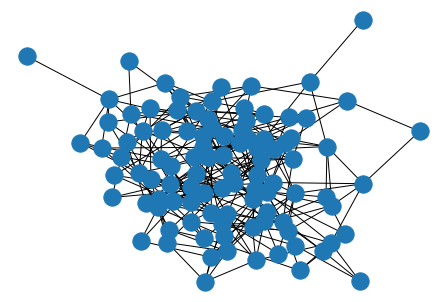

In [10]:
nx.draw(G)

In [11]:
G.degree

DegreeView({548792: 7, 798009: 4, 564982: 6, 505389: 6, 754102: 6, 220701: 6, 735057: 5, 408824: 6, 381267: 6, 121747: 3, 533495: 4, 138855: 6, 269518: 8, 784817: 4, 681965: 5, 261103: 3, 111157: 3, 599410: 7, 375579: 7, 181689: 4, 400835: 3, 436413: 3, 420433: 9, 338764: 7, 391638: 11, 176384: 1, 427951: 4, 261448: 9, 385833: 9, 250474: 4, 660021: 6, 548447: 7, 968258: 5, 743747: 5, 567793: 4, 412019: 7, 197311: 7, 369827: 5, 689278: 9, 856464: 10, 746723: 8, 561583: 5, 681588: 6, 399850: 7, 605268: 3, 571880: 6, 933522: 5, 255515: 7, 508167: 1, 364123: 7, 877774: 7, 529729: 4, 568626: 4, 916509: 3, 634845: 9, 251554: 2, 904191: 5, 134658: 9, 946904: 8, 641057: 6, 257357: 8, 768839: 11, 623678: 6, 258467: 6, 157859: 5, 467737: 2, 671791: 4, 351243: 6, 443882: 4, 756709: 3, 719581: 7, 592092: 6, 151624: 4, 434190: 6, 820256: 3, 216350: 6, 412835: 7, 270232: 7, 193782: 8, 896907: 4, 556539: 6, 638474: 9, 717290: 7, 799003: 3, 435928: 7, 789908: 3, 146178: 4, 693952: 7, 731198: 8, 450833

## Create an Erdons Renyi Random Graph


In [18]:
er = nx.erdos_renyi_graph(n = 100, p= 0.2, seed = 21)

## Create an Barabasi Albert Graph


In [19]:
ba = nx.barabasi_albert_graph(n = 100, m = 2, seed = 21)

# Plot of the networks


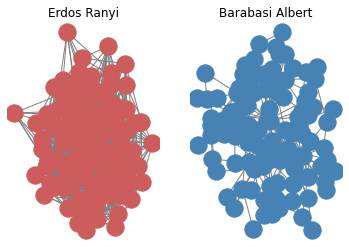

In [20]:
plt.subplot(1, 2, 1)
nx.draw(er, edge_color = "grey", node_color = "indianred")
plt.title('Erdos Ranyi')

plt.subplot(1, 2, 2)
nx.draw(ba, edge_color = "grey", node_color = "steelblue")
plt.title('Barabasi Albert')


plt.show()

### Total degree


In [21]:
def tot_degree(G):
    tot_deg = 0
    for i in range (0, len(G)):
        for j in range (0, len(G)):
            tot_deg += G.number_of_edges(i, j)
    return tot_deg

print('Total degree of Erdos Ranyi network:', tot_degree(er))
print('Total degree of Barabasi Albert network:', tot_degree(ba))

Total degree of Erdos Ranyi network: 1998

Total degree of Barabasi Albert network: 392

### Calculate average degree


In [22]:
def avg_degree(G):
    avg_degree = tot_degree(G)/len(G)
    return avg_degree

print('Average degree of Erdos Ranyi network:', round(avg_degree(er),4))
print('Average degree of Barabasi Albert network:', round(avg_degree(ba),4))

Average degree of Erdos Ranyi network: 19.98

Average degree of Barabasi Albert network: 3.92

### Degree distribution


In [23]:

def degrees(G):
    degrees = []
    for i in range(0, len(G)):
        degrees.append(G.degree(i))
    return degrees

### Plotting a histogram


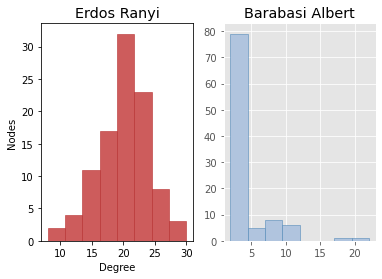

In [24]:
#Erdos Ranyi
plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.hist(degrees(er), bins = 8,
         color = 'indianred',        
         edgecolor = 'firebrick')
plt.title('Erdos Ranyi')

#labels
plt.xlabel('Degree')
plt.ylabel('Nodes')

#Barabasi Albert
plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.hist(degrees(ba), bins = 8,
         color = 'lightsteelblue',
         edgecolor = 'steelblue')
plt.title('Barabasi Albert')



plt.show()

### Plotting a density graph


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


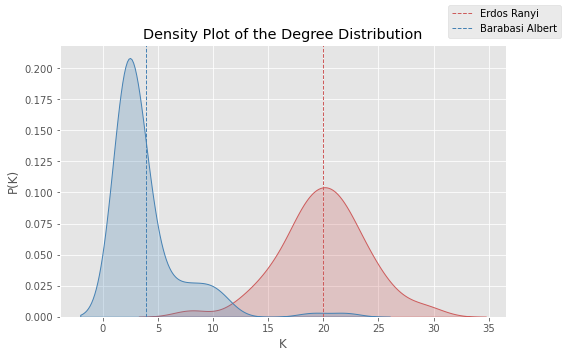

In [26]:
fig = plt.figure(figsize=(8,5))

#Erdos Ranyi
sns.distplot(degrees(er), hist = False, kde = True,
             color = 'indianred',
           kde_kws = {'shade': True,
                          'linewidth': 1})

plt.axvline(avg_degree(er), 
            color = 'indianred',
           linestyle = 'dashed',
           linewidth = 1)

#Barabasi Albert
sns.distplot(degrees(ba), hist = False, kde = True,
             color = 'steelblue',
           kde_kws = {'shade': True,
                          'linewidth': 1})
plt.axvline(avg_degree(ba), 
            color = 'steelblue',
           linestyle = 'dashed',
           linewidth = 1)

#Titles, labels and legen
plt.xlabel('K')
plt.ylabel('P(K)')
plt.title('Density Plot of the Degree Distribution')
fig.legend(labels=['Erdos Ranyi','Barabasi Albert'])
plt.show()

# Building the Clustering Coefficient



In [27]:
#Calculating the denominator and appending it into a list:
def max_edges(G):
    medges = []
    for i in range(0, len(G)):
        medges.append(G.degree(i)*(G.degree(i)-1))
    return medges


In [28]:
# Calculating the nominator and appending it into a list:
def triangles(G):
    list_friends = []
    list_mine = []
    triangles = 0
    triangles_list = []

    for m in range (0, len(G)):
        for i in range(0, len(G)):
            if G.number_of_edges(m, i) > 0 and m!=i:
                list_mine.append(i)
                for j in range(0, len(G)):
                    if G.number_of_edges(i,j) > 0 and i != j:
                        list_friends.append(j)

        # calculate the amount of edges in common among neigh.
        for z in range(0, len(list_mine)):
            for k in range(0, len(list_friends)):
                if list_mine[z]==list_friends[k]:
                    triangles += 1
        triangles_list.append(triangles)
        triangles = 0
        list_friends = []
        list_mine = []
    return triangles_list


In [29]:
# Putting it all together:
def clust_coef(G):   
    Cu = []
    for i in range(0, len(G)):
        Cu.append(triangles(G)[i]/max_edges(G)[i])
    net_cc = round(sum(Cu)/len(G), 4)
    return net_cc

In [30]:
print("Clustering coefficient of Erdos Ranyi:", clust_coef(er))
print("Clustering coefficient of Barabasi Albert:", clust_coef(ba))

Clustering coefficient of Erdos Ranyi: 0.2001

Clustering coefficient of Barabasi Albert: 0.1264

In [ ]:
#visualization

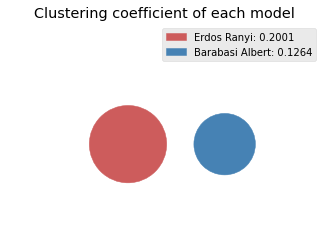

In [31]:
circle1 = plt.Circle((0, 0), 2*(clust_coef(er)), color='indianred')
circle2 = plt.Circle((1, 0), 2*(clust_coef(er)*math.sqrt(clust_coef(ba)/clust_coef(er))), color='steelblue')

fig, ax = plt.subplots()

plt.xlim(-1.25,2)
plt.ylim(-1,1.25)

ax.set_aspect(1)
ax.set_facecolor('xkcd:white')
ax.tick_params(labelbottom=False, labelleft =False, bottom = False, left = False)
ax.legend((circle1, circle2), ('Erdos Ranyi: {}'.format(clust_coef(er)), 'Barabasi Albert: {}'.format(clust_coef(ba))))
plt.title('Clustering coefficient of each model')

ax.add_artist(circle1)
ax.add_artist(circle2)
plt.show()

### other metrics

In [32]:
#Clustering coefficient
cc_er = nx.average_clustering(er)
cc_ba = nx.average_clustering(ba)

In [33]:
#Average path length: Measures the average distance of the shortest path between every pair of nodes.
apl_er = nx.average_shortest_path_length(er)
apl_ba = nx.average_shortest_path_length(ba)

In [34]:
#Assortativity: Measures the similarity of connections in the graph with respect to the node degree.
ast_er = nx.degree_assortativity_coefficient(er)
ast_ba = nx.degree_assortativity_coefficient(ba)

In [35]:
#Density: Measures the ratio between the amount of edges versus the total possible amount of edges.
den_er = nx.density(er)
den_ba = nx.density(ba)

In [36]:
data = {'Model':  ['Erdos Ranyi', 'Barabasi Albert'],
        'Average Degree': [round(avg_degree(er),4), round(avg_degree(ba),4)],
        'Clustering': [round(cc_er,4), round(cc_ba,4)],
        'Average Path Length': [round(apl_er,4), round(apl_ba,4)],
        'Assortativity': [round(ast_er,4), round(ast_ba,4)],
        'Density': [round(den_er,4), round(den_ba,4)]
        }
df = pd.DataFrame(data)
df

,Model,Average Degree,Clustering,Average Path Length,Assortativity,Density
0,Erdos Ranyi,19.98,0.2001,1.8115,-0.0598,0.2018
1,Barabasi Albert,3.92,0.1264,3.0917,-0.1055,0.0396


### Calculating and plotting centrality measures


In [41]:
def plots(centrality):
    fig = plt.figure(figsize=(18,6))
    #Erdos Ranyi
    plt.subplot(1, 2, 1)
    pos = nx.spring_layout(er)
    colors = df_er[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Reds,
        "with_labels": True,
    }


    nx.draw(er, pos, **options)
    plt.title('Erdos Ranyi {} Centrality'.format(centrality))


    #Barabasi Albert
    plt.subplot(1, 2, 2)
    pos = nx.spring_layout(ba)
    colors = df_ba[centrality]
    options = {
        "node_color": colors,
        "node_size": 500,
        "edge_color": 'lightgrey',
        "width": 1,
        "cmap": plt.cm.Blues,
        "with_labels": True,
    }


    nx.draw(ba, pos, **options)
    plt.title('Barabasi Albert {} Centrality'.format(centrality))

    plt.show()

#### DEGREE CENTRALITY
 

In [42]:
df_er = pd.DataFrame(degrees(er), columns = ['Degrees'])
df_ba = pd.DataFrame(degrees(ba), columns = ['Degrees'])

In [43]:
# reorder df, to assign the good color to each node
df_er = df_er.reindex(er.nodes())
df_ba = df_ba.reindex(ba.nodes())

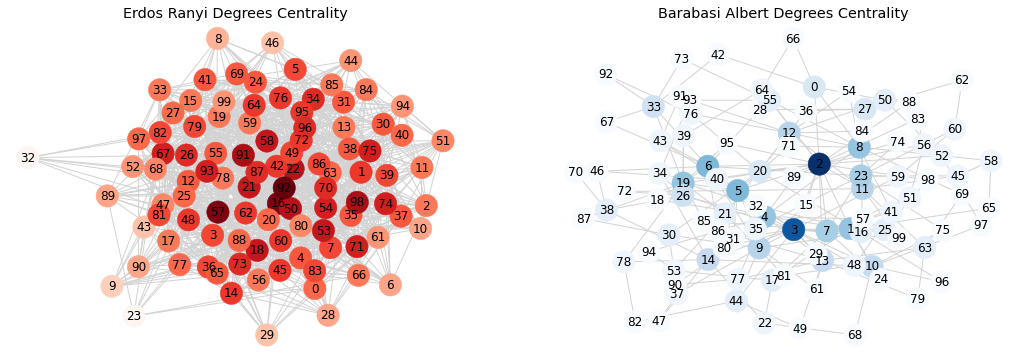

In [44]:
plots('Degrees')

#### EIGENVECTOR CENTRALITY


In [45]:
eigenvector_centrality_er = nx.eigenvector_centrality(er)
eigenvector_centrality_ba = nx.eigenvector_centrality(ba)

In [46]:
# Saving just the eigenvector values in the data frames
eigenvector_centrality_er = [(eigenvector_centrality_er[node]) for node in eigenvector_centrality_er]
eigenvector_centrality_ba = [(eigenvector_centrality_ba[node]) for node in eigenvector_centrality_ba]

In [47]:
df_er['Eigenvector'] = eigenvector_centrality_er
df_ba['Eigenvector'] = eigenvector_centrality_ba

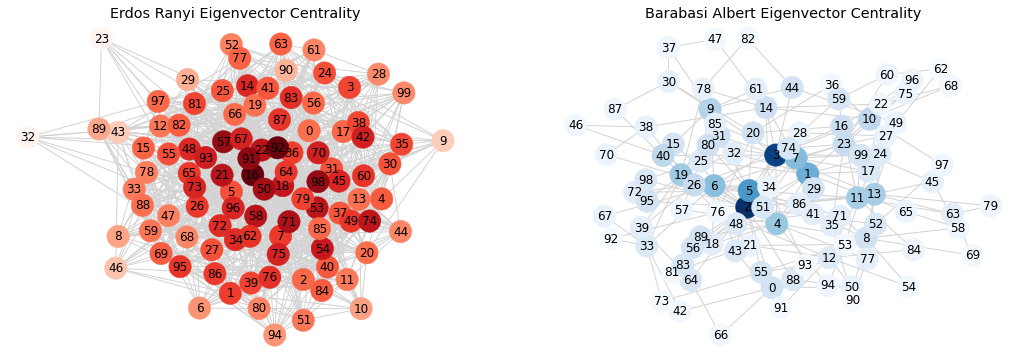

In [48]:
plots('Eigenvector')

#### CLOSENESS CENTRALITY


In [49]:
closeness_er = nx.closeness_centrality(er)
closeness_ba = nx.closeness_centrality(ba)

In [50]:
# Saving just the closeness values in the data frames
closeness_er = [(closeness_er[node]) for node in closeness_er]
closeness_ba = [(closeness_ba[node]) for node in closeness_ba]

In [51]:
df_er['Closeness'] = closeness_er
df_ba['Closeness'] = closeness_ba

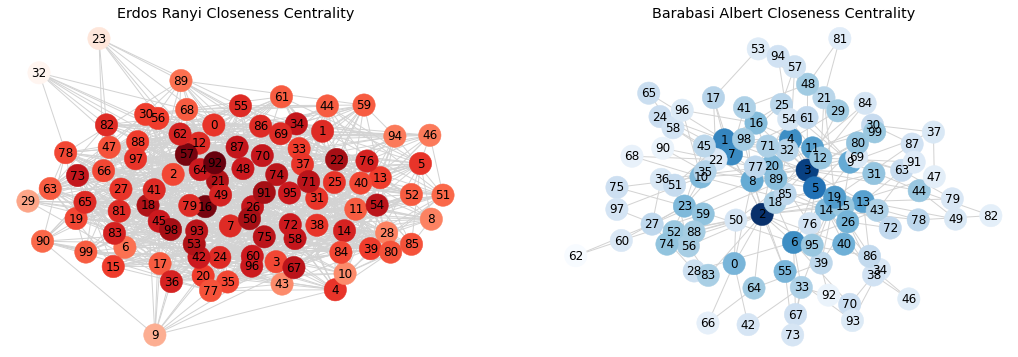

In [52]:
plots('Closeness')


#### BETWEENNESS CENTRALITY



In [53]:
betweenness_er = nx.betweenness_centrality(er)
betweenness_ba = nx.betweenness_centrality(ba)

In [54]:

# Saving just the betweenness values in the data frames
betweenness_er = [(betweenness_er[node]) for node in betweenness_er]
betweenness_ba = [(betweenness_ba[node]) for node in betweenness_ba]

In [55]:
df_er['Betweenness'] = betweenness_er
df_ba['Betweenness'] = betweenness_ba

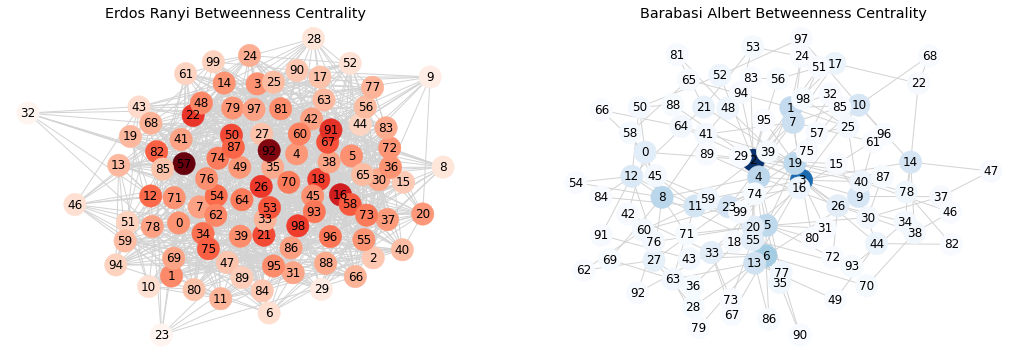

In [56]:
plots('Betweenness')